In [3]:
# conda activate r4.0.2
invisible(lapply(c("SingleR","S4Vectors","ggpubr","openxlsx","Seurat","SeuratDisk",
                   "magrittr"), function(x) {
                           suppressPackageStartupMessages(library(x,character.only = T))
                   }))
source("https://raw.githubusercontent.com/nyuhuyang/SeuratExtra/master/R/Seurat3_functions.R")
path <- paste0("output/",gsub("-","",Sys.Date()),"/")
if(!dir.exists(path)) dir.create(path, recursive = T)

In [6]:
# conda activate r4.0.2
Convert("../output/20200914_BladderCancerImmune.h5ad", 
        dest = "../output/20200914_BladderCancerImmune.h5seurat", overwrite = F)

Warning message:
“Unknown file type: h5ad”
Warning message:
“'assay' not set, setting to 'RNA'”
Creating h5Seurat file for version 3.1.2

Adding X as scale.data

Adding raw/X as data

Adding raw/X as counts

Adding meta.features from raw/var

Adding dispersions from scaled feature-level metadata

Adding dispersions_norm from scaled feature-level metadata

Merging feature_types from scaled feature-level metadata

Merging gene_ids from scaled feature-level metadata

Adding highly_variable from scaled feature-level metadata

Merging log1p_mean_counts from scaled feature-level metadata

Merging log1p_total_counts from scaled feature-level metadata

Adding mean from scaled feature-level metadata

Merging mean_counts from scaled feature-level metadata

Adding means from scaled feature-level metadata

Merging mt from scaled feature-level metadata

Merging n_cells from scaled feature-level metadata

Merging n_cells_by_counts from scaled feature-level metadata

Adding n_counts from scaled featu

In [7]:
object <- LoadH5Seurat("../output/20200914_BladderCancerImmune.h5seurat")

Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding scale.data for RNA

Adding feature-level metadata for RNA

Adding reduction pca

Adding cell embeddings for pca

Adding feature loadings for pca

Adding miscellaneous information for pca

Adding reduction umap

Adding cell embeddings for umap

Adding miscellaneous information for umap

Adding command information

Adding cell-level metadata

Adding miscellaneous information

Adding tool-specific results



In [8]:
singlerDF = readRDS("../output/20200915_singleR_pred.rds")

In [9]:
singlerDF

DataFrame with 47423 rows and 5 columns
                                                                             scores
                                                                           <matrix>
AAACCCAAGCACGGAT-1-0-0    0.310368406622891:0.156670143892473:0.262957666062234:...
AAACCCAAGGACGCAT-1-0-0    0.228085115061736:0.162988641541855:0.280307334367524:...
AAACCCAAGGGCGAAG-1-0-0    0.335479677248591:0.154638294339845:0.284896093093823:...
AAACCCACAATACCTG-1-0-0   0.258031046421754:0.273955250202148:0.0967426332897624:...
AAACCCACAATCCTAG-1-0-0    0.213102384845222:0.156008678951511:0.277915478417207:...
...                                                                             ...
TTTGTTGCAAGTTGGG-1-17-17  0.344999637764735:0.273874669254508:0.160959955343446:...
TTTGTTGCACTTGGCG-1-17-17   0.46215637372509:0.546922099422801:0.177738386126234:...
TTTGTTGGTAGCTCGC-1-17-17 0.196642280733386:0.230202932798216:0.0429421824052991:...
TTTGTTGGTCGCTTAA-1-17-17   0.2633400

In [11]:
as.data.frame(table(singlerDF$labels))

Var1,Freq
<fct>,<int>
Adipocytes,1509
Astrocytes,584
"B cells, naive",1315
Chondrocytes,154
CLP,1177
CMP,49
DC,205
Endothelial cells,234
Eosinophils,122


In [15]:
table(colnames(object) == rownames(singlerDF))


 TRUE 
47423 

In [23]:
object@meta.data[,"labels"] = singlerDF$labels

In [25]:
singlerDF$labels = gsub("T cells, CD","T cells CD",singlerDF$labels)

In [27]:
object@meta.data[,"main_labels"] = gsub(",.*","",singlerDF$labels)

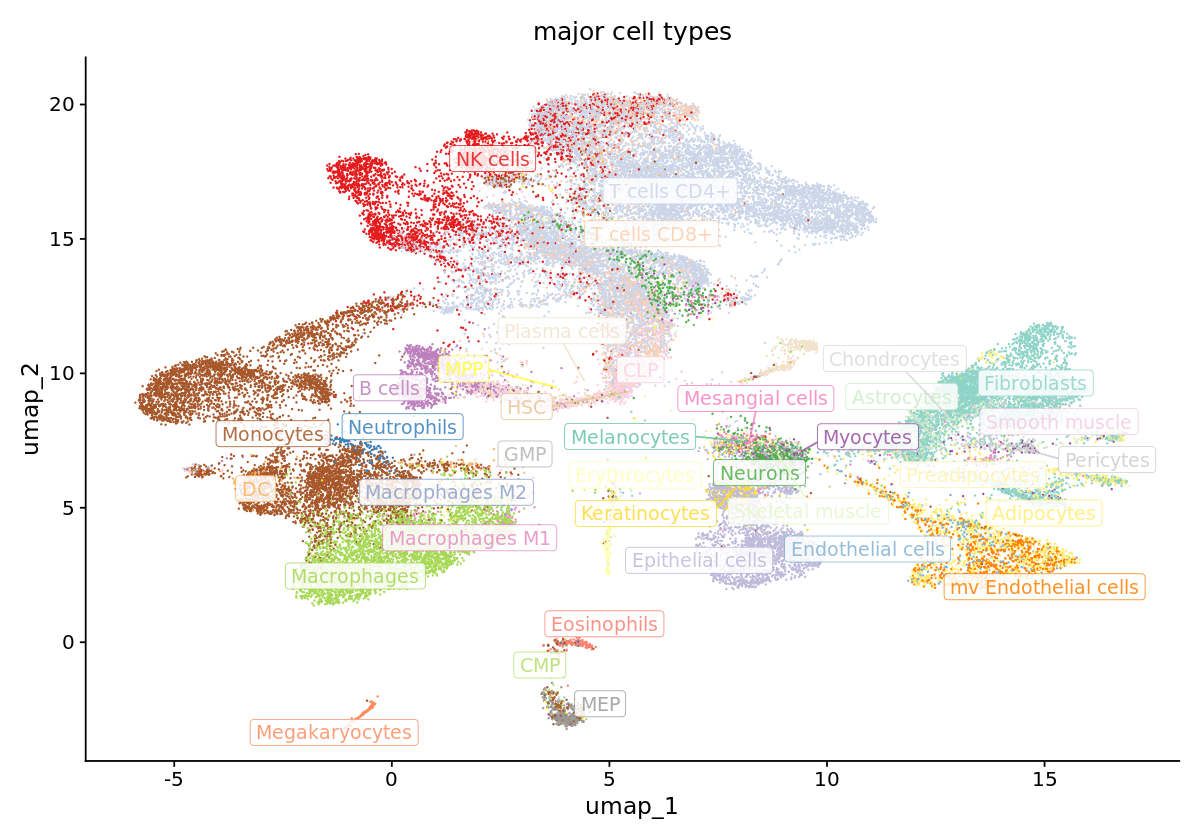

In [36]:
options(repr.plot.width=10, repr.plot.height=7)
UMAPPlot.1(object, group.by = "main_labels", cols = rev(singler.colors), label = T, label.repel = T, no.legend = T,
          title = "major cell types")

In [38]:
saveRDS(object, file = "../data/20200914_BladderCancerImmune.rds")

In [9]:
table(grepl("NK|T cells", singlerDF$labels))


FALSE  TRUE 
28950 18473 

In [10]:
T_NK <- grepl("NK|T cells", singlerDF$labels)
T_NK_df <- singlerDF[T_NK,]

In [13]:
T_NK_summary <- as.data.frame(table(T_NK_df$labels))

In [15]:
colnames(T_NK_summary)= c("cell_type", "cell_number")

In [26]:
T_NK_summary[,"cell_type_cell_number"] = paste(T_NK_summary$cell_type,":", T_NK_summary$cell_number)

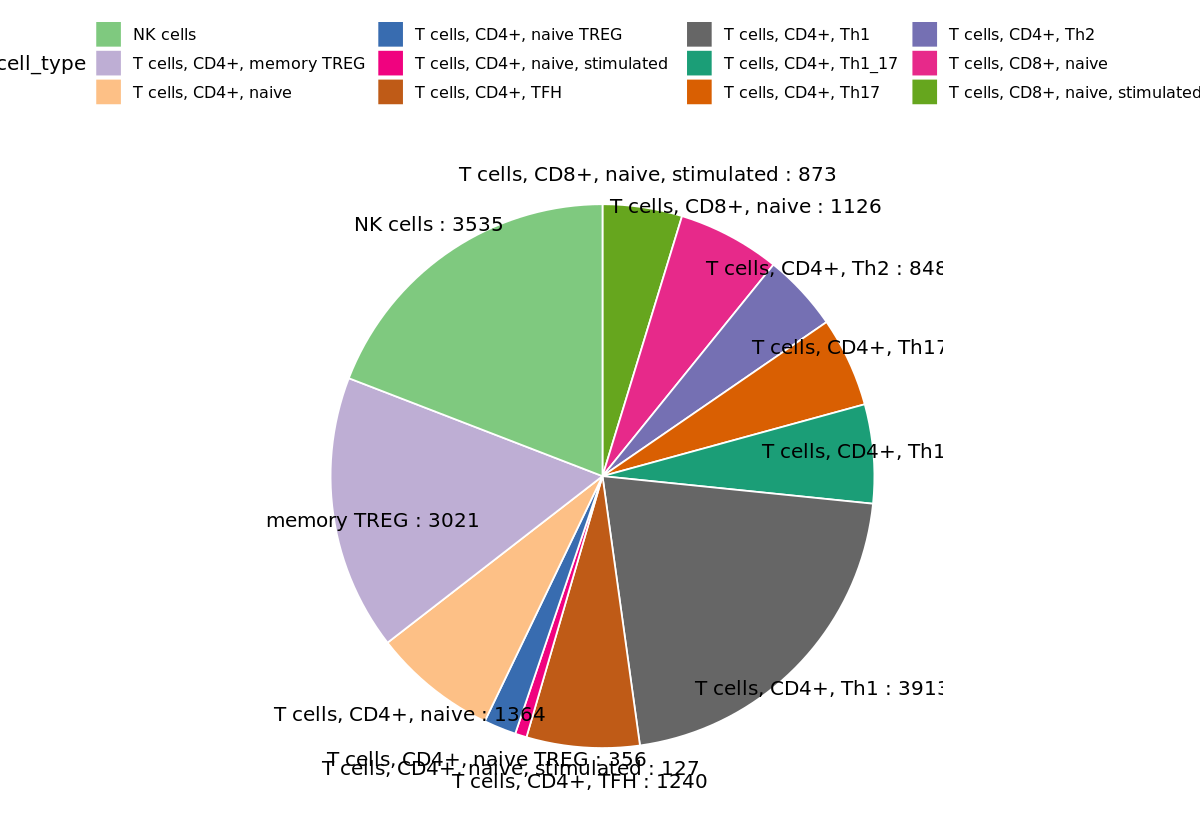

In [36]:
options(repr.plot.width=10, repr.plot.height=7)

ggpie(T_NK_summary, "cell_number", label = "cell_type_cell_number",
      fill = "cell_type", color = "white",
   palette = singler.colors)

In [37]:
adata = sc.read_h5ad("../output/20200729_SCT.h5ad")

ERROR: Error in sc.read_h5ad("../output/20200729_SCT.h5ad"): could not find function "sc.read_h5ad"


In [2]:
adata = sc.read_h5ad("../output/20200914_BladderCancerImmune.h5ad")